In [1]:
from chess import Board, Move, ROOK, BISHOP, KNIGHT, QUEEN, PAWN, KING, WHITE, BLACK
import pandas as pd
import numpy as np
import re, itertools, os

In [2]:
DATA_DIR = 'data/'
ELO_CUTOFF = 2000

In [3]:
cvc_df = pd.read_csv(DATA_DIR + '2016_CvC.csv')
cvh_df = pd.read_csv(DATA_DIR + '2016_CvH.csv')
df = pd.concat([cvc_df, cvh_df])
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

In [4]:
df.shape

(129912, 20)

In [5]:
df.head()

,game,white,black,white_elo,black_elo,white_rd,black_rd,whiteiscomp,blackiscomp,timecontrol,date,time,white_clock,black_clock,eco,plycount,result,result-winner,commentaries,moves
0,"""zerowin"" vs ""GeidiPrime""",zerowin,GeidiPrime,2848,2464,0.0,0.0,Yes,Yes,900+0,2016.12.31,23:17:00,15:00.0,15:00.0,A30,72,1/2-1/2,Draw,Game drawn by mutual agreement,1. c4 c5 2. Nf3 e6 3. g3 b6 4. Bg2 Bb7 5. O-O ...
1,"""GeidiPrime"" vs ""SlowBox""",GeidiPrime,SlowBox,2455,2511,0.0,0.0,Yes,Yes,900+0,2016.12.31,20:25:00,15:00.0,15:00.0,D01,127,1-0,White,Black checkmated,1. d4 Nf6 2. Nc3 d5 3. Bg5 Nbd7 4. Nf3 h6 5. B...
2,"""zerowin"" vs ""GeidiPrime""",zerowin,GeidiPrime,2846,2457,0.0,0.0,Yes,Yes,900+0,2016.12.31,20:03:00,15:00.0,15:00.0,A40,77,1-0,White,Black resigns,1. d4 e6 2. c4 Bb4+ 3. Bd2 Bxd2+ 4. Qxd2 Nf6 5...
3,"""GeidiPrime"" vs ""zerowin""",GeidiPrime,zerowin,2459,2844,0.0,0.0,Yes,Yes,900+0,2016.12.31,19:25:00,15:00.0,15:00.0,C11,128,0-1,Black,White resigns,1. d4 Nf6 2. Nc3 d5 3. Bg5 e6 4. e4 dxe4 5. Nx...
4,"""FishTest"" vs ""GeidiPrime""",FishTest,GeidiPrime,3033,2459,0.0,0.0,Yes,Yes,900+0,2016.12.31,18:42:00,15:00.0,15:00.0,C07,131,1-0,White,Black resigns,1. e4 e6 2. d4 d5 3. Nd2 c5 4. exd5 Qxd5 5. dx...


In [6]:
df = df[(df['commentaries'].str.contains('disconnected')==False) &
        (df['white_elo'] > ELO_CUTOFF) &
        (df['black_elo'] > ELO_CUTOFF)]

In [7]:
df.shape

(76631, 20)

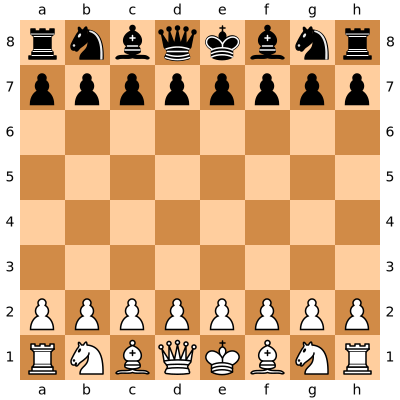

In [8]:
b = Board()
b

In [9]:
dir(b)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algebraic',
 '_attacked_for_king',
 '_attackers_mask',
 '_castling_uncovers_rank_attack',
 '_clear_board',
 '_ep_skewered',
 '_epd_operations',
 '_from_chess960',
 '_generate_evasions',
 '_is_safe',
 '_parse_epd_ops',
 '_push_capture',
 '_remove_piece_at',
 '_repr_svg_',
 '_reset_board',
 '_set_board_fen',
 '_set_castling_fen',
 '_set_chess960_pos',
 '_set_piece_at',
 '_set_piece_map',
 '_slider_blockers',
 '_to_chess960',
 '_transposition_key',
 '_valid_ep_square',
 'aliases',
 'apply_transform',
 'attackers',
 'attackers_mask',
 'attacks',
 'attacks_mask',
 'bishops',
 'board_fen',
 'can_

In [10]:
b.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [11]:
openingb  = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'
longtimeb = 'R3K2R/PPPPPPPP/8/8/8/8/pppppppp/4k3 w KQkq - 0 1'
b2 = Board(longtimeb)
list(b2.legal_moves)[0]
for m in b2.legal_moves:
    print(m, 'promo', m.promotion, 'drop', m.drop)

h8g8 promo None drop None
h8f8 promo None drop None
e8f8 promo None drop None
e8d8 promo None drop None
a8d8 promo None drop None
a8c8 promo None drop None
a8b8 promo None drop None
g7g8q promo 5 drop None
g7g8r promo 4 drop None
g7g8b promo 3 drop None
g7g8n promo 2 drop None
f7f8q promo 5 drop None
f7f8r promo 4 drop None
f7f8b promo 3 drop None
f7f8n promo 2 drop None
d7d8q promo 5 drop None
d7d8r promo 4 drop None
d7d8b promo 3 drop None
d7d8n promo 2 drop None
c7c8q promo 5 drop None
c7c8r promo 4 drop None
c7c8b promo 3 drop None
c7c8n promo 2 drop None
b7b8q promo 5 drop None
b7b8r promo 4 drop None
b7b8b promo 3 drop None
b7b8n promo 2 drop None


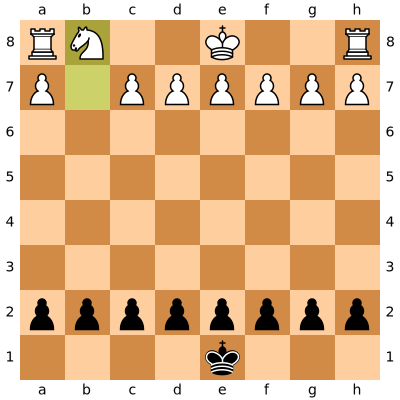

In [12]:
b2.push(list(b2.legal_moves)[-1])
b2

In [13]:
#    +
#    N
# -W   E+
#    S
#    -
DIRECTIONS = ['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE']
WHITE_DIRS, BLACK_DIRS = ['NW', 'N', 'NE'], ['SE', 'S', 'SW'] # Pawn directions
UNDER_PROMOS = [ROOK, BISHOP, KNIGHT]
def deltas2dir(dx, dy):
    if dx > 0 and dy == 0:
        return 'E'
    elif dx > 0 and dy > 0:
        return 'NE'
    elif dx == 0 and dy > 0:
        return 'N'
    elif dx < 0 and dy > 0:
        return 'NW'
    elif dx < 0 and dy == 0:
        return 'W'
    elif dx < 0 and dy < 0:
        return 'SW'
    elif dx == 0 and dy < 0:
        return 'S'
    elif dx > 0 and dy < 0:
        return 'SE'
    else:
        raise ValueError('dx and dy cannot both be 0')


# Since our NN will output an 8x8x73 policy vector we will use these to translate 
# between NN and Board interpretation of a move
def move2idx(move):
    x, y = move.from_square % 8, move.from_square // 8
    dx, dy = move.to_square % 8 - x, move.to_square // 8 - y
    distance, direction = max(abs(dx), abs(dy)), deltas2dir(dx, dy)
    if move.promotion in UNDER_PROMOS: # Pawn underpromotion
        assert y in (6, 1)
        z = UNDER_PROMOS.index(move.promotion) * 3 + 64 + \
            (WHITE_DIRS if y == 6 else BLACK_DIRS).index(direction)
    elif {abs(dx), abs(dy)} == {1, 2}: # Knight move
        z = ((abs(dx) == 2) << 2) & ((dx > 0) << 1) & (dy > 0) + 56
    else: # Queen move or promo to Queen
        z = DIRECTIONS.index(direction) * 7 + distance - 1
    return x, y, z

xy2uci = lambda x, y: 'abcdefgh'[x] + str(y+1)

def idx2move(board, x, y, z):
    if z < 56: # Queen move or promo to Queen
        distance = z % 7 + 1
        direction = DIRECTIONS[z // 7]
        dx = distance * (-1 if 'W' in direction else 1 if 'E' in direction else 0)
        dy = distance * (-1 if 'S' in direction else 1 if 'N' in direction else 0)
        print('promo queen?', (x, y), x+y*8, board.piece_at(x + y * 8).piece_type, y+dy)
        promo = 'q' if board.piece_at(x + y * 8).piece_type == PAWN and (y + dy in (0, 7)) else ''
    elif z < 64: # Knight move
        z -= 56
        dx = 2 if ((z >> 2) & 1) else 1
        dy = 2 if dx == 1 else 1
        dx *= 1 if ((z >> 1) & 1) else -1
        dy *= 1 if ((z >> 0) & 1) else -1
        promo = ''
    elif z < 73: # Pawn underpromotion
        assert y in (6, 1)
        z -= 64
        direction = (WHITE_DIRS if y == 6 else BLACK_DIRS)[z % 3]
        promo = UNDER_PROMOS[z // 3]
        promo = 'r' if promo == ROOK else 'n' if promo == KNIGHT else 'b'
        dx = -1 if 'W' in direction else 1 if 'E' in direction else 0
        dy = -1 if 'S' in direction else 1 if 'N' in direction else 0
    else: # WTF
        raise ValueError('Invalid z >= 73. z = %d.' % z)

    return Move.from_uci(xy2uci(x, y) + xy2uci(x+dx, y+dy) + promo)


In [14]:
piece2plane = {val: idx for idx, val in enumerate([
    (WHITE, PAWN),
    (WHITE, ROOK),
    (WHITE, KNIGHT),
    (WHITE, BISHOP),
    (WHITE, QUEEN),
    (WHITE, KING),
    (BLACK, PAWN),
    (BLACK, ROOK),
    (BLACK, KNIGHT),
    (BLACK, BISHOP),
    (BLACK, QUEEN),
    (BLACK, KING),
    (WHITE, 'has_kingside_castling_rights'),
    (WHITE, 'has_queenside_castling_rights'),
    (BLACK, 'has_kingside_castling_rights'),
    (BLACK, 'has_queenside_castling_rights'),
    'turn'
])}

def board2tensor(board):
    tensor = np.zeros((8, 8, 17), dtype=np.float16)
    
    # 12 Planes for each piece/color combination
    for x, y in itertools.product(range(8), range(8)):
        sqr = x + y*8
        piece = board.piece_at(sqr)
        if not piece: continue
        plane = piece2plane[(piece.color, piece.piece_type)]
        tensor[x][y][plane] = 1
    
    # 4 planes for castling rights
    combinations = itertools.product((WHITE, BLACK), (board.has_queenside_castling_rights, board.has_kingside_castling_rights))
    for color, func in combinations:
        if func(color):
            plane = piece2plane[(color, func.__name__)]
            tensor[:,:,plane] = 1
    
    # 1 plane is 1 if it is BLACK's turn to move, else 0 if WHITE's turn
    if board.turn == BLACK:
        plane = piece2plane['turn']
        tensor[:,:,plane] = 1
    
    return tensor


def state2policy(board, best_move_idx):
    tensor = np.zeros((8, 8, 73), dtype=np.float16)
    for x, y, z in (move2idx(m) for m in board.legal_moves):
        tensor[x][y][z] = 1
    
    x, y, z = best_move_idx
    tensor[x][y][z] = 20           # Make the best move worth more
    return tensor / np.sum(tensor) # Turn tensor into probabilities (sum(tensor) == 1)


In [15]:
# TODO: Very slow and parallelizable. Add multiprocessing.
def save_training_data():
    if not os.path.exists('train'):
            os.mkdir('train')
    
    for i, (result, moves) in enumerate(zip(df.result, df.moves)):
        if i % 1000 == 0:
            print(i)
        state_tensors, values, policy_tensors = [], [], []
        result = result.strip()
        moves = sum([m.strip().split() for m in re.split(r'[0-9]+\. ', moves) if m], [])
        # value of state from player's perspective 
        # 1 from winner's perspective, -1 from loser's perspective, 0 if tie
        value = 1 if result == '1-0' else -1 if result == '0-1' else 0
        board = Board()
        for move in moves:
            move = board.parse_san(move)
            input_tensor = board2tensor(board)
            policy_tensor = state2policy(board, move2idx(move))
            
            # Store data point
            state_tensors.append(input_tensor)
            values.append(value)
            policy_tensors.append(policy_tensor)
            
            # Move to next data point
            board.push(move)
            value *= -1
        
        np.save(f'train/{i}.npy', [state_tensors, values, policy_tensors])
    print(i)

# save_training_data()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
76630


In [ ]:
class DataLoader():